In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("ginjal.csv")
df.head()

,Unnamed: 0,gravitas,albumin,hemoglobin,ureum,anemia,klasifikasi
0,0,1.020,1.0,15.4,36.0,no,ckd
1,1,1.020,4.0,11.3,18.0,no,ckd
2,2,1.010,2.0,9.6,53.0,yes,ckd
3,3,1.005,4.0,11.2,56.0,yes,ckd
4,4,1.010,2.0,11.6,26.0,no,ckd


In [3]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.head()

,gravitas,albumin,hemoglobin,ureum,anemia,klasifikasi
0,1.020,1.0,15.4,36.0,no,ckd
1,1.020,4.0,11.3,18.0,no,ckd
2,1.010,2.0,9.6,53.0,yes,ckd
3,1.005,4.0,11.2,56.0,yes,ckd
4,1.010,2.0,11.6,26.0,no,ckd


In [4]:
from sklearn.model_selection import train_test_split
X = df.drop("klasifikasi", axis=1)
y = df["klasifikasi"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [5]:
import joblib

models = joblib.load(r"C:\Users\danim\Downloads\bjirrrr\models.joblib")
models

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['gravitas', 'albumin',
                                                   'hemoglobin', 'ureum']),
                                                 ('cat',
                                                  Pipeline(steps=[('mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   OrdinalEncoder())]),
                                                  ['anemia'])])),
                ('nb', BernoulliNB())])

In [6]:
models.predict(X_test)

C:\Users\danim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [7]:
y_test.shape, X_test.shape

((80,), (80, 5))

In [8]:
models.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['gravitas', 'albumin',
                                                   'hemoglobin', 'ureum']),
                                                 ('cat',
                                                  Pipeline(steps=[('mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   OrdinalEncoder())]),
                                                  ['anemia'])])),
                ('nb', BernoulliNB())])

In [9]:
models.predict(X_test)

array(['ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd',
       'notckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd',
       'notckd', 'notckd', 'ckd', 'notckd', 'ckd', 'ckd', 'notckd',
       'notckd', 'ckd', 'notckd', 'ckd', 'ckd', 'notckd', 'ckd', 'notckd',
       'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd',
       'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd',
       'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'notckd', 'notckd', 'notckd',
       'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'notckd',
       'ckd', 'ckd', 'ckd', 'notckd', 'notckd', 'notckd', 'ckd', 'notckd',
       'ckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'notckd', 'ckd',
       'notckd'], dtype='<U6')

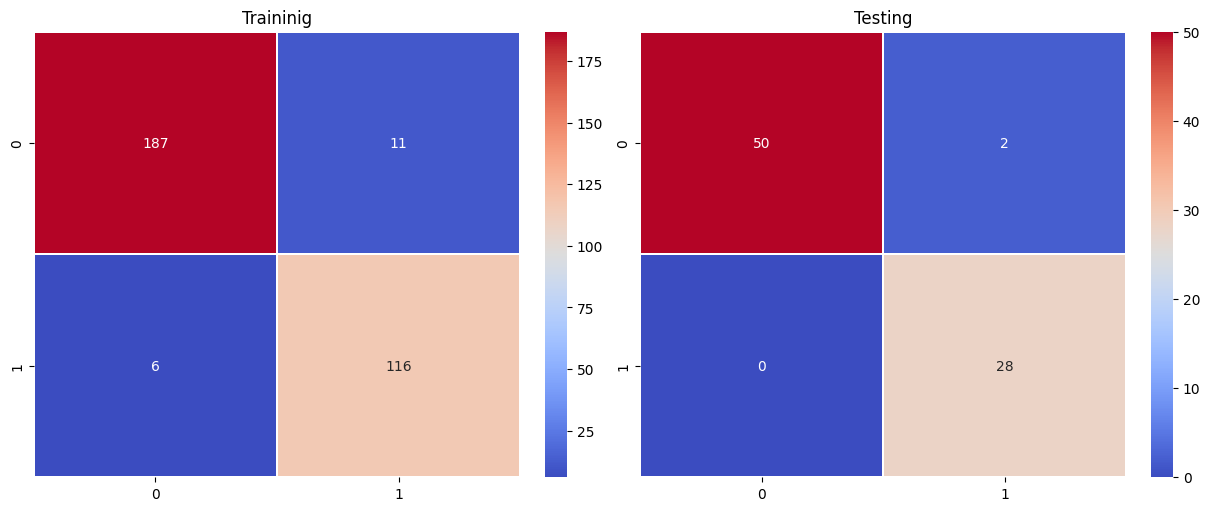

In [11]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_pred = models.predict(X_test)
fig, ax = plt.subplots(1, 2, figsize=(12, 5), layout="constrained")
sns.heatmap(confusion_matrix(y_train, models.predict(X_train)), annot=True, fmt="d", cmap="coolwarm", linewidths=0.2, linecolor="white", ax=ax[0])
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="coolwarm", linewidths=0.2, linecolor="white", ax=ax[1])

ax[0].set_title("Traininig")
ax[1].set_title("Testing")
plt.show()

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ckd       1.00      0.96      0.98        52
      notckd       0.93      1.00      0.97        28

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



In [19]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="notckd")
recall = recall_score(y_test, y_pred, pos_label="notckd")
f1 = f1_score(y_test, y_pred, pos_label="notckd")
print(f""""
Akurasi  : {accuracy*100:.2f}%
Presisi  : {precision*100:.2f}%
Recall   : {recall*100:.2f}%
F1 Score : {f1*100:.2f}%
      """)

"
Akurasi  : 97.50%
Presisi  : 93.33%
Recall   : 100.00%
F1 Score : 96.55%
      


In [16]:
y_test.to_numpy(), y_pred

(array(['ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd',
        'notckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd',
        'notckd', 'notckd', 'ckd', 'notckd', 'ckd', 'ckd', 'notckd',
        'notckd', 'ckd', 'notckd', 'ckd', 'ckd', 'notckd', 'ckd', 'notckd',
        'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd',
        'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd',
        'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'notckd', 'ckd', 'notckd',
        'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'notckd',
        'ckd', 'ckd', 'ckd', 'notckd', 'notckd', 'notckd', 'ckd', 'notckd',
        'ckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'notckd', 'ckd',
        'notckd'], dtype=object),
 array(['ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd', 'notckd', 'ckd',
        'notckd', 'ckd', 'ckd', 'notckd', 'ckd', 'ckd', 'ckd', 'ckd',
        'notckd', 'notckd', 'ckd', 'notckd', 'ckd', 'ckd', 'notckd',
        'notckd', 'ckd', 'notckd', 'ckd', '

In [20]:
import joblib

joblib.dump(models, "models.joblib")

['models.joblib']

In [24]:
y_pred=="notckd"

array([False,  True, False, False, False, False,  True, False,  True,
       False, False,  True, False, False, False, False,  True,  True,
       False,  True, False, False,  True,  True, False,  True, False,
       False,  True, False,  True, False,  True, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
        True, False, False, False, False, False,  True,  True,  True,
        True, False,  True, False, False, False, False,  True,  True,
       False, False, False,  True,  True,  True, False,  True, False,
       False, False,  True, False, False,  True, False,  True])

In [25]:
X_test.iloc[1, :]

gravitas      1.02
albumin        0.0
hemoglobin    13.3
ureum         33.0
anemia          no
Name: 280, dtype: object